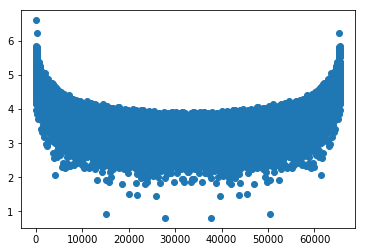

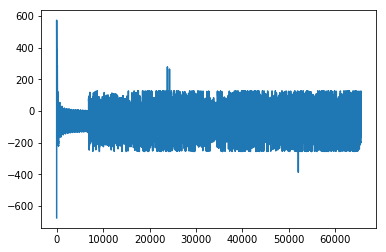

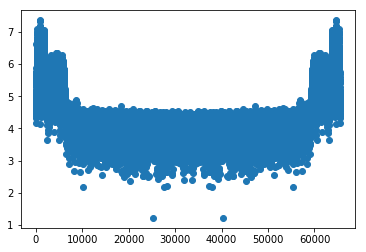

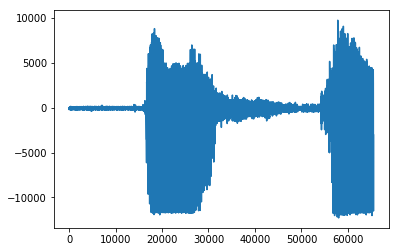

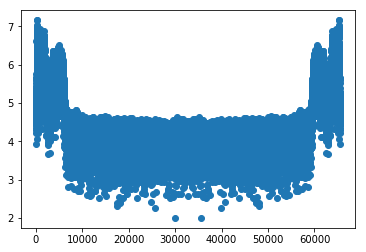

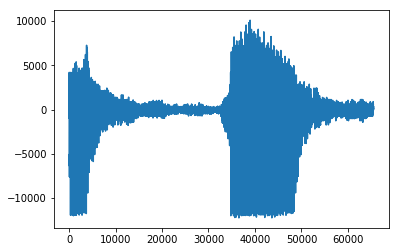

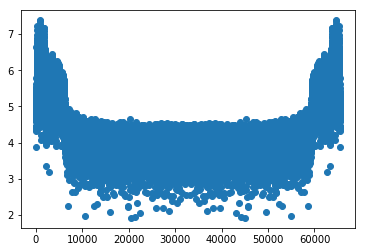

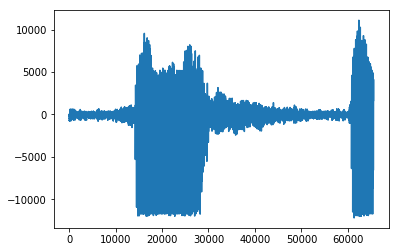

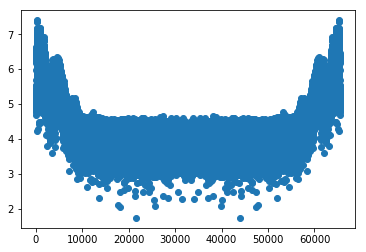

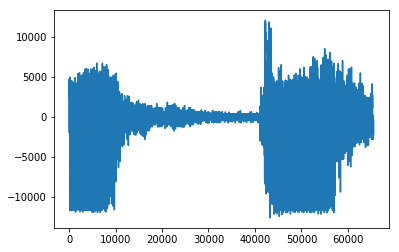

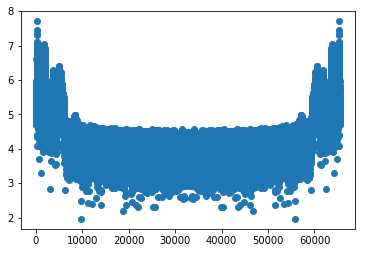

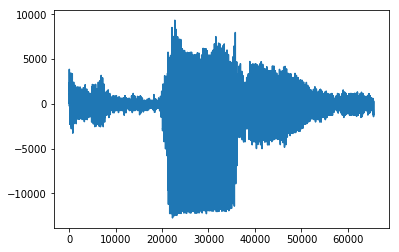

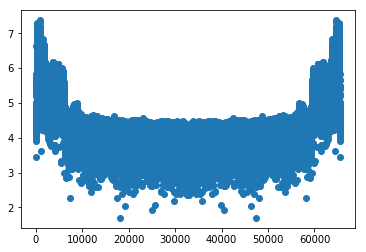

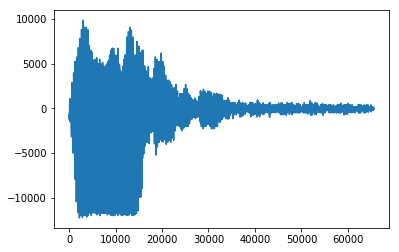

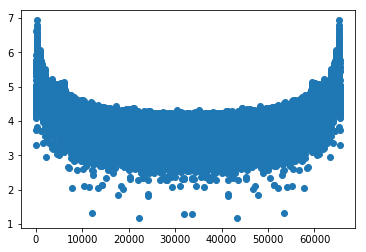

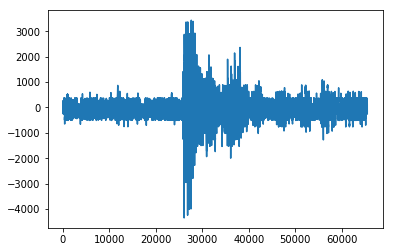

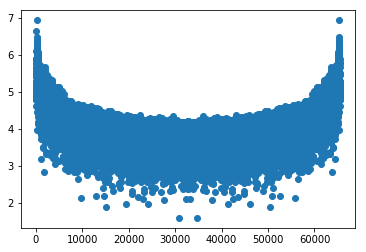

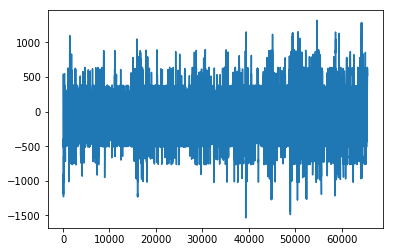

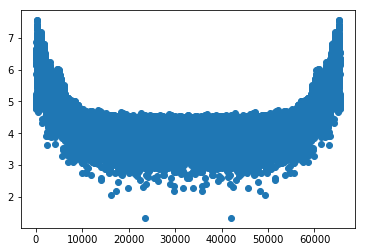

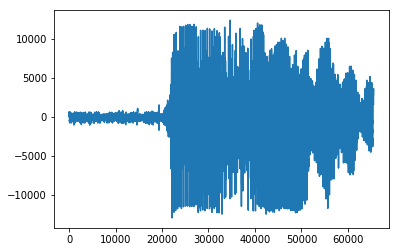

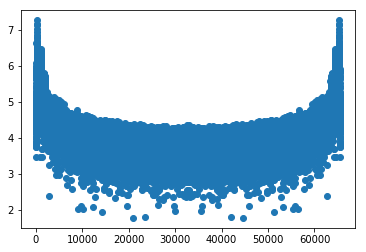

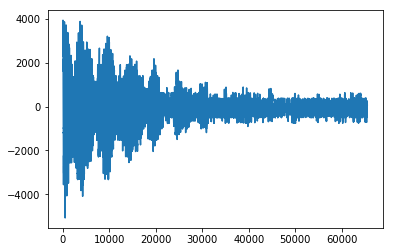

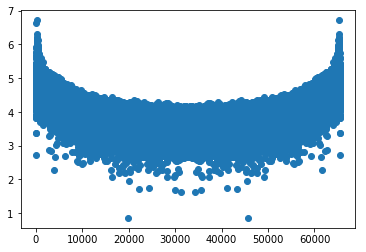

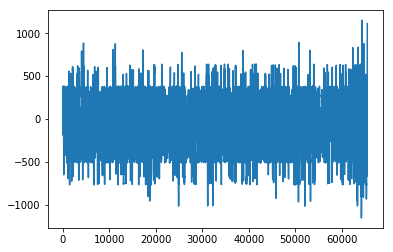

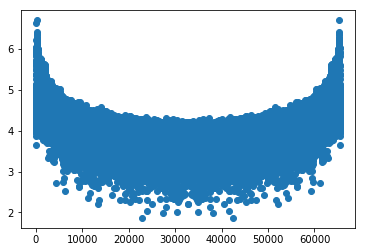

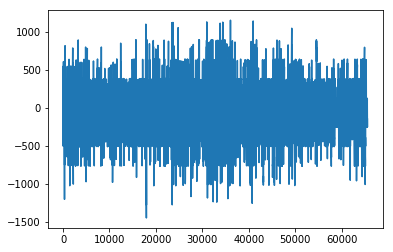

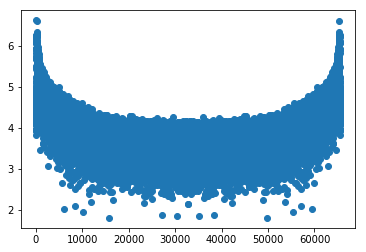

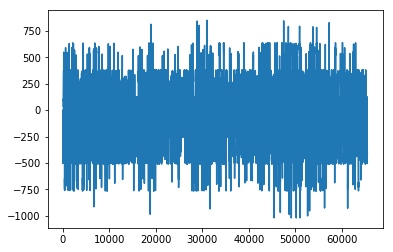

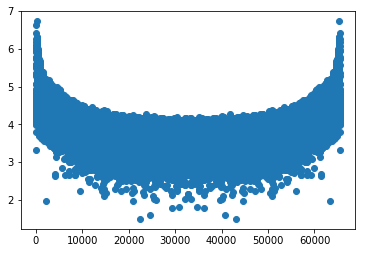

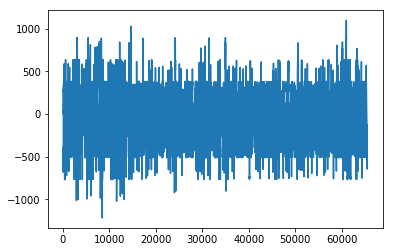

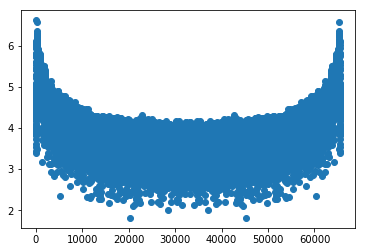

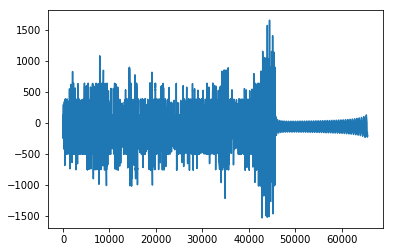

C:\Users\Max-Hsu\Anaconda3\envs\testa\lib\site-packages\ipykernel_launcher.py:177: RuntimeWarning: divide by zero encountered in log10


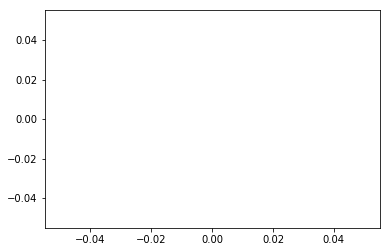

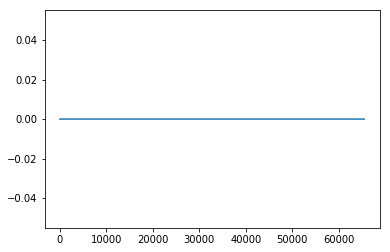

'\nprint("Our fft in y=sin(pi/250x)")\nfullGraph(fft_T(sin500))\nprint("numpy fft in y=sin(pi/250x)")\nfullGraph(np.fft.fft(sin500))\nprint("Our fft in y=x")\nfullGraph(fft_T(list(range(1<<num))))\nprint("numpy fft in y=x")\nfullGraph(np.fft.fft(list(range(1<<num))))\n'

In [1]:
import math
import numpy as np
import time
import matplotlib.pyplot as plt
import wave
%matplotlib inline

num =16 #16384
pi = math.pi
sin500=[]
for i in range(1<<num):
    sin500.append(np.sin(pi/250*i))
#print(*sin500)
'''
real=[]
imaga=[]
for i in range(1<<num):
    real.append(np.cos(pi/250*i))
    imaga.append(np.sin(pi/250*i))
'''

def readfile():
    fileuni = open("C:\\Users\\Max-Hsu\\Desktop\\homework\\G1-2\\Calculus\\project\\unichannel")
    fileuni.readline()
    fileuni.readline()
    counter=0
    status=True
    while status == True:
        arraylist=[]
        counter=0
        while counter<(1<<num) and status == True:
            getnum=fileuni.readline()
            getnum=getnum[:-1]
            if(getnum == ""):
                status=False
                break
            arraylist+=[int(getnum)]
            counter=counter+1    
        if(status == False):
            for i in range((1<<num)-counter):
                arraylist.append(0)
        #print(fft_T(arraylist))
        #fullGraph(fft_T(arraylist))
        fullGraph(np.fft.fft(arraylist))
        #print(arraylist)
        del arraylist

def fft_T(x):
    # must x size must be 2^N
    #print(x)
    x = np.asarray(x, dtype=np.double)
    n = x.shape[0]
    #print(n)
    if n <= 32:
        numberList = np.arange(n)
        i = numberList.reshape((n, 1))   # turn to column
        M = np.exp(-2j * pi * i * numberList / n) # every twiddle factor of all time sector
        return np.dot(M, x) # matrix dot product

    X_even = fft_T(x[::2])
    X_odd = fft_T(x[1::2])
    twiddleFactor = np.exp(-1j * pi * np.arange(n>>1) / (n>>1)) # half
    return np.concatenate([X_even + twiddleFactor * X_odd, X_even - twiddleFactor * X_odd])


def fft_F(log2_N, real, imaginary):
    # log2_N is the size
    # real, imaginary are the list
    # print("fft start")
    N = 1 << log2_N
    n = 0
    span = N >> 1
    while span > 0:
        root = pi / span
        for submatrix in range( math.floor((N>>1)/span)):
            for node in range( span ):
                nspan = n + span
                temp = real[n] + real[nspan]
                real[nspan] = real[n] - real[nspan]
                real[n] = temp
                temp = imaginary[n] + imaginary[nspan]
                imaginary[nspan] = imaginary[n] - imaginary[nspan]
                imaginary[n] = temp

                theta = root * node
                realTwiddleVector = math.cos(theta)
                imaginaryTwiddleVector = math.sin(theta)
                temp = realTwiddleVector * real[nspan] - imaginaryTwiddleVector * imaginary[nspan]
                imaginary[nspan] = realTwiddleVector * imaginary[nspan] + imaginaryTwiddleVector * real[nspan]
                real[nspan] = temp
                
                n+=1
            n = (n + span) & (N-1) 
        span >>= 1

 # the factor of testing 3 different function 

def testFFT_F():
    l = list(range(1<<num))
    im = [0]*(1<<num)
    fft_F(num, l, im)
    result = []
    for i in range(1<<num):
        result.append(complex(l[i], im[i]))
    result = np.array(result)
    print(*result)


def testFFT_T():
    l = fft_T(list(range(1<<num)))
    print(*l)

def numpyFFT():
    l = np.fft.rfft(list(range(1<<num)))
    print(*l)

def speedTest():
    start = time.time()
    testFFT_F()
    end = time.time()
    print(end-start)
    print()

    start = time.time()
    testFFT_T()
    end = time.time()
    print(end-start)
    print()

    start = time.time()
    numpyFFT()
    end = time.time()
    print(end-start)


# SCC test 
def testForT_and_F():
    l = list(range(1<<num))
    im = [0]*(1<<num)
    fft_F(num, l, im)
    result_F = []
    for i in range(1<<num):
        result_F.append(complex(l[i], im[i]))
    result_F = np.array(result_F)
    print(*result_F)
    result_T = fft_T(result_F)
    print(*result_T)

def changeToFreqGraph():
    l = list(range(1<<num))
    im = [0]*(1<<num)
    fft_F(num, l, im)
    radius = []
    for i in range (len(l)):
        radius.append(math.sqrt((l[i]**2) + (im[i]**2)))
    #print(radius)

def testAngle(A):
    print(*np.angle(A))
    

def fullGraph(raw_FFT):
    #print(*np.abs(raw_FFT))
    freq = [0]*((1<<num)+1)
    '''
    for i in raw_FFT:
        m = np.angle(i) 
        if(m<0):
            m += 2*pi
        freq[int(round(m*(1<<num)/2/pi,0))] += np.abs(i)
    '''
    #raw_FFT=raw_FFT[0:len(raw_FFT)/2]
    #freq[np.angle(raw_FFT)/(1<<num)]+=np.abs(raw_FFT)
    #angle = np.angle(raw_FFT)/(1<<num)
    #amplitude = np.abs(raw_FFT)
    
    plt.plot(range(1<<num),np.log10(np.abs(raw_FFT)),'o')
    #plt.xlim([2500,3500])
    plt.show()
    
    inverseTest(raw_FFT)
    #inverseIntoWav(raw_FFT)
    
   

def inverseTest(raw):
    #raw=np.negative(raw)
    plt.plot(range(1<<num),(np.real(np.fft.ifft(raw))))
    #plt.xlim([0,100]) 
    plt.show()
    
    inverseIntoWav(np.real(np.fft.ifft(raw)))

def inverseIntoWav(*inputa):
    for i in np.nditer(inputa, op_flags=['readwrite']):
        change=int(i)
        if change<0:
            change=change+65536
        lastE=change%128
        firstE=change>>8
        #print((firstE).to_bytes(1, byteorder='big'),(lastE).to_bytes(1, byteorder='big'))
        writeFile.writeframes((lastE).to_bytes(1, byteorder='big'))
        writeFile.writeframes((firstE).to_bytes(1, byteorder='big'))
        
        

'''
testForT_and_F()
'''
#changeToFreqGraph()

#testing reading
#print(readfile())
writeFile=wave.open("C:\\Users\\Max-Hsu\\Desktop\\homework\\G1-2\\Calculus\\project\\testify.wav","wb")
writeFile.setnchannels(1)
writeFile.setframerate(44100)
writeFile.setsampwidth(2)

readfile()


writeFile.close()

#print(next(readfile()))

#print("\n\n")
#print(next(readfile()))
'''
print("Our fft in y=sin(pi/250x)")
fullGraph(fft_T(sin500))
print("numpy fft in y=sin(pi/250x)")
fullGraph(np.fft.fft(sin500))
print("Our fft in y=x")
fullGraph(fft_T(list(range(1<<num))))
print("numpy fft in y=x")
fullGraph(np.fft.fft(list(range(1<<num))))
'''
#fft_F(num,real,imaga)

#plt.plot(range(1<<num),np.sqrt(np.square(imaga)+np.square(real)),'o')
#plt.plot(sin500,'o')